In [51]:
# folder name in the data/ folder
# must contain a set of 150x150px images and nothing else
TARGET = "ladygaga"

In [52]:
import csv
import os

index = "data/{}.csv".format(TARGET)
with open(index, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(("name","tags"))
    for i in os.listdir("data/{}".format(TARGET)):
        writer.writerow(("{}/{}".format(TARGET, i), "brvtal"))

In [53]:
from fastai.vision import *
from fastai import *

empty_data = ImageDataBunch.single_from_classes("data/", ["not_brvtal","brvtal"], size=28)
learn = create_cnn(empty_data, models.resnet18)
learn = learn.load("brvtality-72")
all_data_bunch = ImageDataBunch.from_csv("data/", csv_labels="{}.csv".format(TARGET), size=28, valid_pct=0.5)
all_data = all_data_bunch.train_ds + all_data_bunch.valid_ds

In [54]:
all_preds = []
for i in all_data:
    calc_cat, _, probs = learn.predict(i[0])
    brvtality = probs[1]
    all_preds.append({"image": i[0], "brvtality": brvtality,
                      "decision": calc_cat})

In [55]:
def plot_stuff(data):
    """Expects list of image,caption two-tuples"""
    data = list(data)
    cols = 4
    rows = math.ceil(len(data) / 4)
    fig, axes = plt.subplots(rows, cols, figsize=(12,12))
    for i in range(len(data)):
        im = data[i][0]
        im.show(ax=axes.flat[i], title=data[i][1])

In [56]:
most_brvtal = sorted(all_preds, key=lambda x: x["brvtality"])

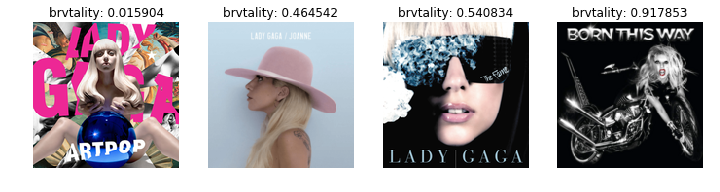

In [57]:
plot_stuff((i["image"], "brvtality: {:f}".format(i["brvtality"]))
           for i in most_brvtal)